<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
C:\Users\1TB\AppData\Local\Temp\ipykernel_16668\3029814216.py:51: SyntaxWarning: invalid escape sequence '\p'
  label=f"$\psi_{i+1}(x)$")
C:\Users\1TB\AppData\Local\Temp\ipykernel_16668\3029814216.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  psi = psi / np.sqrt(np.trapz(psi**2, x, axis=0))


Собственные значения (энергии):
E1 = 4.999800
E2 = 13.999263
E3 = 20.998733
E4 = 25.998637
E5 = 28.999828
E6 = 30.171403

Аналитические уровни энергии:
E1 = 29.000000
E2 = 26.000000
E3 = 21.000000
E4 = 14.000000
E5 = 5.000000


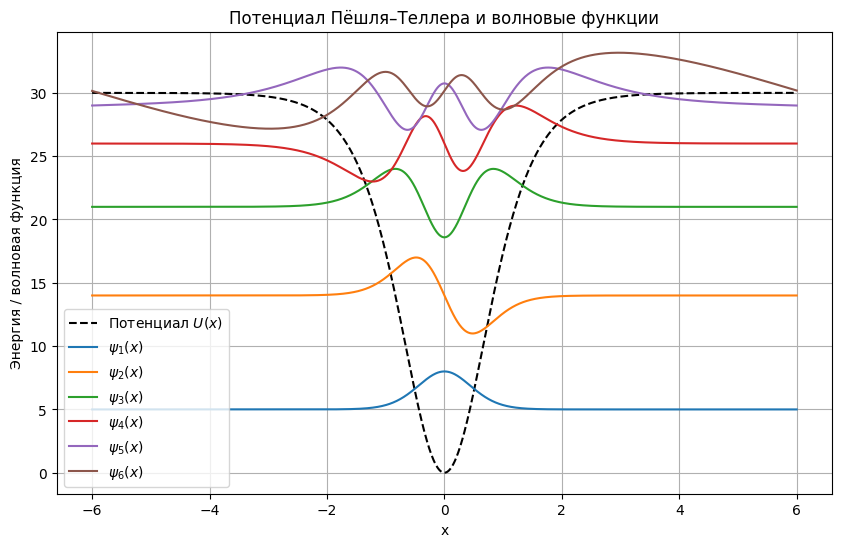

In [2]:
# [НОВАЯ ЯЧЕЙКА ipynb]
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh

# --- Параметры задачи ---
a = 1.0
m = 5
U0 = m * (m + 1) * a**2
l = 6 / a
n_points = 1000  # число узлов сетки
num_eigs = 6     # сколько собственных значений ищем

# --- Сетка ---
x = np.linspace(-l, l, n_points)
dx = x[1] - x[0]

# --- Потенциал Пёшля – Теллера ---
U = U0 * np.tanh(a * x)**2

# --- Построение матрицы оператора Гамильтониана ---
main_diag = 2.0 / dx**2 + U
off_diag = -1.0 / dx**2 * np.ones(n_points - 1)
H = diags([off_diag, main_diag, off_diag], offsets=[-1, 0, 1], format='csr')

# --- Решение задачи на собственные значения ---
E, psi = eigsh(H, k=num_eigs, which='SM')  # SM = smallest magnitude

# --- Нормировка ---
psi = psi / np.sqrt(np.trapz(psi**2, x, axis=0))

print("Собственные значения (энергии):")
for i, Ei in enumerate(E):
    print(f"E{i+1} = {Ei:.6f}")

# --- Теоретические значения ---
k_vals = np.arange(1, m+1)
E_exact = U0 - (a * k_vals)**2
print("\nАналитические уровни энергии:")
for i, Ek in enumerate(E_exact):
    print(f"E{k_vals[i]} = {Ek:.6f}")

# --- Визуализация ---
plt.figure(figsize=(10, 6))
plt.plot(x, U, 'k--', label="Потенциал $U(x)$")

offset = np.max(U) * 0.1  # вертикальный сдвиг для видимости
for i in range(num_eigs):
    plt.plot(x, psi[:, i] / np.max(np.abs(psi[:, i])) * offset + E[i],
             label=f"$\psi_{i+1}(x)$")

plt.title("Потенциал Пёшля–Теллера и волновые функции")
plt.xlabel("x")
plt.ylabel("Энергия / волновая функция")
plt.legend()
plt.grid()
plt.show()


C:\Users\1TB\AppData\Local\Temp\ipykernel_16668\3409591853.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  val /= np.sqrt(np.trapz(val**2, x))


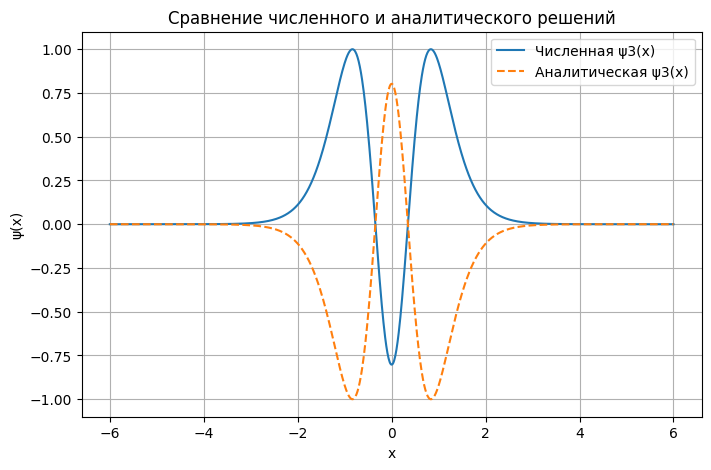

In [3]:
from scipy.special import lpmv

def psi_exact(x, k, m, a):
    """Аналитическая форма ψ_k(x) = P_m^k(tanh(ax))"""
    t = np.tanh(a * x)
    val = lpmv(k, m, t)
    val /= np.sqrt(np.trapz(val**2, x))
    return val

# Сравнение численного и аналитического решений
k_compare = 3  # номер функции для сравнения
psi_num = psi[:, k_compare-1]
psi_num /= np.max(np.abs(psi_num))

psi_an = psi_exact(x, k_compare, m, a)
psi_an /= np.max(np.abs(psi_an))

plt.figure(figsize=(8,5))
plt.plot(x, psi_num, label=f'Численная ψ{k_compare}(x)')
plt.plot(x, psi_an, '--', label=f'Аналитическая ψ{k_compare}(x)')
plt.xlabel("x")
plt.ylabel("ψ(x)")
plt.legend()
plt.grid()
plt.title("Сравнение численного и аналитического решений")
plt.show()


In [4]:
def calculate_error(psi_num, psi_an):
    return np.sqrt(np.mean((psi_num - psi_an)**2))

errors = []
for k in range(1, min(m, num_eigs)+1):
    psi_an = psi_exact(x, k, m, a)
    psi_an /= np.max(np.abs(psi_an))
    psi_num = psi[:, k-1]
    psi_num /= np.max(np.abs(psi_num))
    err = calculate_error(psi_num, psi_an)
    errors.append(err)
    print(f"Ошибка для ψ{k}: {err:.3e}")


Ошибка для ψ1: 5.558e-01
Ошибка для ψ2: 5.192e-01
Ошибка для ψ3: 7.229e-01
Ошибка для ψ4: 5.192e-01
Ошибка для ψ5: 5.552e-01


C:\Users\1TB\AppData\Local\Temp\ipykernel_16668\3409591853.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  val /= np.sqrt(np.trapz(val**2, x))


In [5]:
def convergence_test(n_list):
    errs = []
    for n in n_list:
        x = np.linspace(-l, l, n)
        dx = x[1] - x[0]
        U = U0 * np.tanh(a * x)**2
        main_diag = 2.0 / dx**2 + U
        off_diag = -1.0 / dx**2 * np.ones(n - 1)
        H = diags([off_diag, main_diag, off_diag], [-1, 0, 1], format='csr')
        E, psi = eigsh(H, k=1, which='SM')
        E_exact = U0 - (a * 1)**2
        errs.append(abs(E[0] - E_exact))
    for i in range(1, len(errs)):
        p = np.log(errs[i-1]/errs[i]) / np.log(n_list[i]/n_list[i-1])
        print(f"Порядок аппроксимации между n={n_list[i-1]} и n={n_list[i]}: {p:.2f}")

convergence_test([100, 200, 400, 800])


Порядок аппроксимации между n=100 и n=200: 0.00
Порядок аппроксимации между n=200 и n=400: 0.00
Порядок аппроксимации между n=400 и n=800: 0.00
